In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#!pip install pandasql
import pandasql

In [3]:
df = pd.read_csv("PBL5recommendationdata.csv",encoding = "ISO-8859-1")

In [4]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,...,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF04970,NaN,NaN
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF03045,NaN,NaN


In [5]:
#customers = df.filter(like='Customers')
#customers.head()

In [6]:
#orders = df.filter(like='Orders')
#orders.head()

In [7]:
#products = df.filter(like='Products')
#products.sample(5)

In [8]:
#customers.isnull().sum()

In [9]:
df=df.drop(["Customers.lname","Customers.fname","Customers.company","Customers.status","Customers.mailing","Customers.reminders","Customers.tax_exempt","Customers.account_id","Customers.sales_rep","Customers.rewards","Customers.profile_id","Customers.customer_type"], axis=1)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 169 entries, Customers.id to Products.freight_cost
dtypes: float64(89), int64(10), object(70)
memory usage: 5.4+ MB


In [11]:
#products.isnull().sum()

In [12]:
df=df.drop(["Products.seo_category","Products.qb_edit_sequence","Products.shopzilla_cat","Products.shopping_cat","Products.shopping_gtin","Products.last_modified","Products.flags","Products.cost","Products.import_id","Products.seo_url","Products.seo_title","Products.pricegrabber_cat","Products.shopping_mpn","Products.amazon_item_type","Products.amazon_asin","Products.google_shopping_type","Products.google_shopping_id","Products.shopping_type","Products.thefind_cat","Products.quickbooks_id","Products.long_description","Products.short_description","Products.packaging","Products.template","Products.hcpcs","Products.family_id","Products.display_name","Products.name","Products.id","Products.hygienic","Products.lit_label","Products.seo_keywords","Products.shopping_color","Products.sale_price","Products.product_type","Products.menu_name","Products.left_flag","Products.right_flag","Products.shopping_gender","Products.shopping_age","Products.amazon_type","Products.amazon_price","Products.google_adwords","Products.price_break_type","Products.price_breaks","Products.websites","Products.video","Products.audio","Products.seo_description","Products.seo_header","Products.seo_footer","Products.display_packaging","Products.length","Products.width","Products.height","Products.rx","Products.latex","Products.msds_link","Products.msds_label","Products.lit_link","Products.markup","Products.notes","Products.map_price","Products.features_title","Products.warranty","Products.default_quantity","Products.user_size","Products.assembly","Products.installation","Products.shipping_weight","Products.handling_time","Products.rotation_link","Products.google_shopping_label","Products.product_option","Products.size","Products.material","Products.arm_style","Products.leg_style","Products.seat_size","Products.freight_cost"],axis=1)

In [13]:
df["Products.vendor"].fillna(1,inplace=True)

In [14]:
df["Products.status"].fillna(0,inplace=True)

In [15]:
df["Products.list_price"].fillna(df["Products.list_price"].mean(),inplace=True)

In [16]:
df["Products.price"].fillna(df["Products.price"].mean(),inplace=True)

In [17]:
df["Products.taxable"].fillna(1,inplace=True)

In [18]:
#df["Products.shopping_brand"].fillna("MEDLINE",inplace=True)

In [19]:
df["Products.shopping_flags"].fillna(62,inplace=True)

In [20]:
df["Products.google_shopping_cat"].fillna("Health & Beauty > Health Care",inplace=True)

In [21]:
df["Products.unit"].fillna("EA",inplace=True)

In [22]:
df["Products.saved_status"].fillna(0,inplace=True)

In [23]:
df["Products.shipping_height"].fillna(df["Products.shipping_height"].mean(),inplace=True)

In [24]:
df["Products.shipping_width"].fillna(df["Products.shipping_width"].mean(),inplace=True)

In [25]:
df["Products.shipping_length"].fillna(df["Products.shipping_length"].mean(),inplace=True)

In [26]:
df["Products.multiple"].fillna("1 CS",inplace=True,limit=600)

In [27]:
df["Products.multiple"].fillna("1 EA",inplace=True,limit=630)

In [28]:
df["Products.upc"].fillna(df["Products.upc"].mean(),inplace=True)

In [29]:
df["Products.case_qty"].fillna(df["Products.case_qty"].mean(),inplace=True)

In [30]:
df["Products.import_flags"].fillna(df["Products.import_flags"].mean(),inplace=True)

In [31]:
df["Products.override_markup"].fillna(1,inplace=True,limit=150)

In [32]:
df["Products.override_markup"].fillna(0,inplace=True,limit=1124)

In [33]:
df["Products.shopping_brand"].value_counts()

MEDLINE                         2672
Drive Medical                    535
HARTMANN-CONCO INC               122
CanDo&reg;                       113
Fabrication Enterprises Inc.      85
                                ... 
PERRIGO                            1
DeVilbiss Healthcare               1
AcuForce&reg;                      1
AdvanTrode&reg;                    1
Val-u-Band                         1
Name: Products.shopping_brand, Length: 101, dtype: int64

In [34]:
df.isnull().sum()

Customers.id                0
Customers.create_date       0
Customers.last_modified     0
Orders.id                   0
Orders.customer_id          0
                           ..
Products.import_flags       0
Products.shipping_length    0
Products.shipping_width     0
Products.shipping_height    0
Products.saved_status       0
Length: 89, dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 89 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customers.id                   4194 non-null   int64  
 1   Customers.create_date          4194 non-null   int64  
 2   Customers.last_modified        4194 non-null   int64  
 3   Orders.id                      4194 non-null   int64  
 4   Orders.customer_id             4194 non-null   int64  
 5   Orders.fname                   4194 non-null   object 
 6   Orders.lname                   4194 non-null   object 
 7   Orders.company                 728 non-null    object 
 8   Orders.order_number            4194 non-null   object 
 9   Orders.reorder_id              82 non-null     float64
 10  Orders.external_source         365 non-null    object 
 11  Orders.external_id             5 non-null      float64
 12  Orders.currency                4194 non-null   o

In [36]:
#orders.isnull().sum()

In [37]:
df=df.drop(["Products.shopping_brand","Orders.payment_status","Order_Items.flags","Order_Items.reorder_frequency","Order_Items.registry_item","Order_Items.product_name","Order_Items.related_id","Order_Items.account_id","Order_Items.id","Order_Items.attribute_prices","Order_Items.attributes","Order_Items.attribute_names","Order_Items.product_id","Orders.payment_date","Orders.updated_date","Orders.shipped_date","Orders.payment_code","Orders.payment_id","Orders.tax","Orders.tracking","Orders.shipping_method","Orders.shipping_carrier","Orders.currency","Orders.customer_id","Orders.id","Orders.placed_date","Orders.payment_type","Orders.fname","Orders.order_number","Orders.lname","Orders.company","Orders.company","Orders.reorder_id","Orders.external_source","Orders.external_id","Orders.sales_rep","Orders.coupon_id","Orders.coupon_amount","Orders.gift_id","Orders.gift_amount","Orders.fee_name","Orders.fee_amount","Orders.discount_name","Orders.discount_amount","Orders.balance_due","Orders.shipping_trans","Orders.shipping_flags","Orders.weight","Orders.payment_method","Orders.purchase_order","Orders.payment_ref","Orders.comments","Orders.registry_id","Orders.gift_message","Orders.website","Orders.mailing","Orders.flags","Orders.payment_user","Orders.partial_ship","Orders.notes"],axis=1)

In [38]:
df["Orders.payment_amount"].fillna(df["Orders.payment_amount"].mean(),inplace=True)

In [39]:
df["Orders.shipping"].fillna(df["Orders.shipping"].mean(),inplace=True)

In [40]:
df["Orders.customer_type"].fillna("0",inplace=True)

In [41]:
df["Order_Items.cost"].fillna(df["Order_Items.cost"].mean(),inplace=True)

In [42]:
df = df.astype({"Orders.customer_type": int})

In [43]:
#o.isnull().sum()

In [44]:
df["Orders.subtotal"].value_counts()

24.40     36
16.23     33
127.99    32
116.99    28
26.09     24
          ..
65.66      1
99.78      1
87.78      1
9.12       1
24.54      1
Name: Orders.subtotal, Length: 1847, dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customers.id                  4194 non-null   int64  
 1   Customers.create_date         4194 non-null   int64  
 2   Customers.last_modified       4194 non-null   int64  
 3   Orders.subtotal               4194 non-null   float64
 4   Orders.shipping               4194 non-null   float64
 5   Orders.total                  4194 non-null   float64
 6   Orders.payment_amount         4194 non-null   float64
 7   Orders.status                 4194 non-null   int64  
 8   Orders.customer_type          4194 non-null   int64  
 9   Order_Items.parent            4194 non-null   int64  
 10  Order_Items.qty               4194 non-null   int64  
 11  Order_Items.price             4194 non-null   float64
 12  Order_Items.cost              4194 non-null   float64
 13  Pro

In [46]:
df["Order_Items.cost"].value_counts()

97.00     136
44.94      72
12.11      52
103.00     52
16.83      38
         ... 
71.39       1
70.38       1
150.00      1
59.71       1
675.00      1
Name: Order_Items.cost, Length: 1336, dtype: int64

In [47]:
df.isnull().sum()

Customers.id                    0
Customers.create_date           0
Customers.last_modified         0
Orders.subtotal                 0
Orders.shipping                 0
Orders.total                    0
Orders.payment_amount           0
Orders.status                   0
Orders.customer_type            0
Order_Items.parent              0
Order_Items.qty                 0
Order_Items.price               0
Order_Items.cost                0
Products.status                 0
Products.vendor                 0
Products.list_price             0
Products.price                  0
Products.taxable                0
Products.shopping_flags         0
Products.google_shopping_cat    0
Products.unit                   0
Products.multiple               0
Products.upc                    0
Products.case_qty               0
Products.override_markup        0
Products.import_flags           0
Products.shipping_length        0
Products.shipping_width         0
Products.shipping_height        0
Products.saved

In [48]:
df["Products.google_shopping_cat"]=df["Products.google_shopping_cat"].str.replace("[^\w\s]","")

In [49]:
df["Products.google_shopping_cat"]=df["Products.google_shopping_cat"].str.replace("\d+","")

In [50]:
df["Products.google_shopping_cat"]=df["Products.google_shopping_cat"].str.replace("\n","").replace("\r","")

In [51]:
df["Products.google_shopping_cat"]=df["Products.google_shopping_cat"].str.replace(" ","")

In [52]:
df["Products.unit"]=df["Products.unit"].str.replace("[^\w\s]","")

In [53]:
df["Products.unit"]=df["Products.unit"].str.replace("\d+","")

In [54]:
df["Products.unit"]=df["Products.unit"].str.replace("\n","").replace("\r","")

In [55]:
df["Products.unit"]=df["Products.unit"].str.replace(" ","")

In [56]:
df["Products.multiple"]=df["Products.multiple"].str.replace("[^\w\s]","")

In [57]:
df["Products.multiple"]=df["Products.multiple"].str.replace("\d+","")

In [58]:
df["Products.multiple"]=df["Products.multiple"].str.replace("\n","").replace("\r","")

In [59]:
df["Products.multiple"]=df["Products.multiple"].str.replace(" ","")

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customers.id                  4194 non-null   int64  
 1   Customers.create_date         4194 non-null   int64  
 2   Customers.last_modified       4194 non-null   int64  
 3   Orders.subtotal               4194 non-null   float64
 4   Orders.shipping               4194 non-null   float64
 5   Orders.total                  4194 non-null   float64
 6   Orders.payment_amount         4194 non-null   float64
 7   Orders.status                 4194 non-null   int64  
 8   Orders.customer_type          4194 non-null   int64  
 9   Order_Items.parent            4194 non-null   int64  
 10  Order_Items.qty               4194 non-null   int64  
 11  Order_Items.price             4194 non-null   float64
 12  Order_Items.cost              4194 non-null   float64
 13  Pro

In [61]:
df.head()

,Customers.id,Customers.create_date,Customers.last_modified,Orders.subtotal,Orders.shipping,Orders.total,Orders.payment_amount,Orders.status,Orders.customer_type,Order_Items.parent,...,Products.unit,Products.multiple,Products.upc,Products.case_qty,Products.override_markup,Products.import_flags,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.saved_status
0,797,1426018724,1437764306,57.20,9.95,64.29,64.29,1,0,3758,...,EA,EA,5.504591e+11,1.0,0.0,136.000000,24.80,7.50,30.40,0.0
1,3,1386089139,1437764354,20.00,9.99,29.99,29.99,1,0,23,...,EA,EA,5.504591e+11,1.0,0.0,0.000000,8.00,7.00,1.50,0.0
2,3,1386089139,1437764354,68.78,9.95,78.73,78.73,3,0,9531,...,CS,CS,5.504591e+11,800.0,0.0,65.059943,13.23,10.04,10.24,0.0
3,4,1386780263,1437762646,19.56,9.95,29.55,29.55,1,0,29,...,EA,EA,8.019675e+10,1.0,0.0,65.059943,10.60,7.80,18.50,0.0
4,5,1386861599,1437764316,36.05,9.95,46.00,46.00,1,0,30,...,EA,EA,5.504591e+11,1.0,0.0,65.059943,8.50,2.75,12.00,0.0


In [78]:
df.to_csv('ready_data.csv',index=False)

# Dummies

In [63]:
df_dummies=pd.get_dummies(df,drop_first=True)

In [64]:
df_dummies.isnull().sum()

Customers.id               0
Customers.create_date      0
Customers.last_modified    0
Orders.subtotal            0
Orders.shipping            0
                          ..
Products.multiple_PK       0
Products.multiple_PR       0
Products.multiple_RL       0
Products.multiple_ST       0
Products.multiple_TB       0
Length: 63, dtype: int64

In [65]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 63 columns):
 #   Column                                                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                                                  --------------  -----  
 0   Customers.id                                                                                                                            4194 non-null   int64  
 1   Customers.create_date                                                                                                                   4194 non-null   int64  
 2   Customers.last_modified                                                                                                                 4194 non-null   int64  
 3   Orders.subtotal                                                

In [66]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
from sklearn.ensemble import RandomForestClassifier
r = RandomForestClassifier()
from sklearn.tree import DecisionTreeClassifier
d= DecisionTreeClassifier()
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
from sklearn.neighbors import KNeighborsClassifier
k = KNeighborsClassifier()
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
g = GaussianNB()
b = BernoulliNB()
from xgboost import XGBClassifier
xgbc = XGBClassifier()

In [67]:
algorithms=[g,b,k,log,gbc,r,d,xgbc]
names=["GaussianNB","BernoulliNB","K Nearest","Logistic","GradientBoosting","RandomForest","Decision Tree","XGBC"]

In [68]:
def algo_test(X,y,algorithms= algorithms,names=names):
        # fit the data
    for i in range(len(algorithms)):
        algorithms[i]=algorithms[i].fit(X,y)
    # print metrics
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for i in range(len(algorithms)):
        accuracy.append(accuracy_score(y,algorithms[i].predict(X)))
        precision.append(precision_score(y,algorithms[i].predict(X)))
        recall.append(recall_score(y,algorithms[i].predict(X)))
        f1.append(f1_score(y,algorithms[i].predict(X)))
    metrics = pd.DataFrame(columns=["accuracy","precision","recall","f1"],index=names)
    metrics["accuracy"]=accuracy
    metrics["precision"]=precision
    metrics["recall"]=recall
    metrics["f1"]=f1
    return metrics.sort_values("f1",ascending=False)

In [69]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [70]:
model = KMeans(n_clusters=4)

In [71]:
model = model.fit(df_dummies)

In [72]:
pred = model.predict(df_dummies)

In [73]:
pred_df = pd.DataFrame(pred)


In [74]:
type(pred_df)

pandas.core.frame.DataFrame

In [75]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model = KMeans(n_clusters = no_of_cluster)
        pred = model.fit_predict(df_dummies)
        sum_of_squared_distances.append(model.inertia_)
        score = silhouette_score(df_dummies,pred)
        print("Number of cluster {}, silhouette {}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(9)

Number of cluster 2, silhouette 0.8063591095439339
Number of cluster 3, silhouette 0.9085376406326462
Number of cluster 4, silhouette 0.9238423454544252
Number of cluster 5, silhouette 0.9666090067230069
Number of cluster 6, silhouette 0.9722128643828218
Number of cluster 7, silhouette 0.9729239842613279
Number of cluster 8, silhouette 0.9782200753951185
Number of cluster 9, silhouette 0.9786199158501947


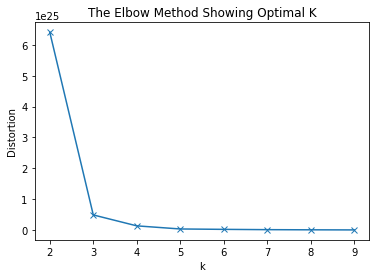

In [76]:
plt.plot(allclusters,sum_of_squared_distances,marker="x")
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("The Elbow Method Showing Optimal K")
plt.show()